In [ ]:
%%HTML
<!-- Mejorar visualización en proyector -->
<style>
.rendered_html {font-size: 1.2em; line-height: 150%;}
div.prompt {min-width: 0ex; }
.container {width:95% !important;}
</style>

# Visualización de datos usando [Matplotlib](https://matplotlib.org/)

Matplotlib es una librería de Python para hacer gráficos en dos dimensiones de alta calidad y altamente 
personalizables

Matplotlib se integra con NumPy y acepta el formato `ndarray`  en sus funciones

Matplotlib se integra con Jupyter mediante la magia `%matplotlib`, que nos permite seleccionar un backend para mostrar los gráficos 
- `inline` : Gráficos rasterizados en el notebook
- `notebook` : Gráficos interactivos en el notebook
- `qt`, `wx`, `gtk` : Gráficos en una ventana 

In [1]:
%autosave 0
# Invocamos la magia con una de las opciones
%matplotlib notebook
# Importamos la librería
import matplotlib as mpl
print(mpl.__version__)
import matplotlib.pyplot as plt
import numpy as np

3.0.3


El modulo pyplot provee funciones para crear un gráfico y mantiene una maquina de estados que añade los diversos elementos que queremos incluir en él

Podemos escoger el estilo general de nuestras gráficas con

In [2]:
print(sorted(mpl.style.available))
plt.style.use('classic')

['Solarize_Light2', '_classic_test', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


- Para dibujar una linea en la figura usamos `plot()`
- En IPython llamar a plot genera inmediatamente la figura
- Si se usa el intérprete normal de Python la figura se muestra usando `show()`

<IPython.core.display.Javascript object>


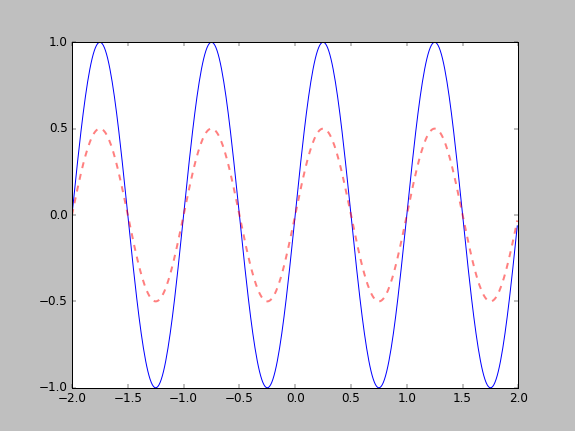

In [3]:
x = np.arange(-2, 2, step=0.01)
y = np.sin(2.0*np.pi*x)

plt.plot(x, y);

Podemos especificar el color, ancho, estilo, transparencia, entre otros

¿Dónde estamos creando esta linea?

In [4]:
plt.plot(x, 0.5*y, color='r', linestyle='--',  linewidth=2, alpha=0.5);

## Anatomía de un gráfico con Matplotlib

- Figura (Figure): Es el elemento principal, actua como un lienzo (canvas) que mantiene los demás elementos
- Ejes (Axes): Sistema de coordenadas. Puede haber más de uno por figura. Se puede configurar su posición dentro de la figura.
- Artistas (Artists): Objetos que se renderean en los ejes (lineas, barras, texto, etc)

Anteriormente, cuando llamamos directamente a `plot` se creaba automaticamente un eje y una figura

Para tener el mayor control posible sobre nuestro gráfico:
1. Creamos una figura y un conjunto de ejes usando `figure` o `subplots`
1. Modificamos la apariencia del gráfico y agregamos artistas usando las funciones de la clase `Axes`

Veremos como 
- Crear lineas de distintos tipos sin y con marcadores
- Agregar un título y nombres para los ejes
- Cambiar los límites, posición y razón de aspecto de los ejes
- Cambiar la frecuencia y tamaño de los ticks de los ejes
- Agregar una grilla
- Agregar una leyenda

<IPython.core.display.Javascript object>


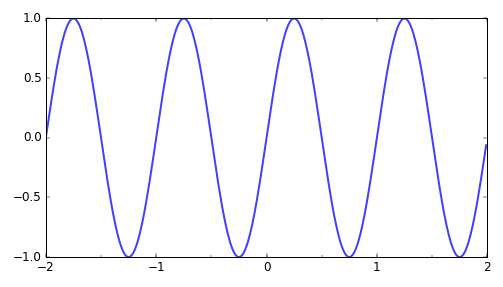

In [5]:
fig, ax = plt.subplots(figsize=(7, 4), tight_layout=True, facecolor='w')

ax.plot(x, y, linewidth=2, alpha=0.75, label='sin(x)')
#ax.plot(x, 0.1*x**3, linewidth=2, alpha=0.75, label=r'$0.1 x^3$')
#ax.plot(x, y**2, linestyle='--', linewidth=2, alpha=0.75, label=r'$\sin^2(x)$')
#ax.plot(x[::10], y[::10]-1, linestyle='none', marker='x', markersize=10, label='cruces')
#ax.plot(x[::20], x[::20], linestyle='none', marker='d', markersize=10, 
#        markerfacecolor='r', markeredgecolor='k', markeredgewidth=2, label='diamantes')

# Lineas: -, --, -., :
# Markers: .,o,x,d,s,1,2,3,4

# Texto para ejes y título
#ax.set_xlabel('Tiempo', fontsize=14, fontname='serif', color="green")
#ax.set_ylabel('Amplitud')
#ax.set_title('Mis primeros pasos en matplotlib')

# Límites de los ejes
# ax.axis('tight')  # Opción por defecto
#ax.axis('equal')
#ax.set_xlim([-2., 2.])
#ax.set_ylim([-1.5, 1.5])
#ax.xaxis.set_ticks_position('top')
#ax.yaxis.set_ticks_position('right')

# Ticks de los ejes
#ax.set_yticks([-1, 0, 1])
#ax.set_xticks([-1, 0, 1])
#ax.set_xticklabels([r'$-2\pi$', 0, r'$2\pi$'])
ax.xaxis.set_major_locator(mpl.ticker.MultipleLocator(1))
ax.xaxis.set_minor_locator(mpl.ticker.MultipleLocator(0.5))
#for label in ax.get_xticklabels():
#    label.set_color("blue")

# Grilla
#ax.grid(color="red", which="major", axis='both', linestyle=':', linewidth=0.5)

# Leyenda
#ax.legend(loc=3, ncol=1
#ax.legend(loc=1, ncol=3, bbox_to_anchor=(1, 1.15))

# Desplazando y eliminando las lineas de los ejes
# ax.spines['right'].set_color('none')
#ax.spines['top'].set_color('none')
#ax.spines['bottom'].set_position(('data', 0))
#ax.spines['left'].set_position(('data', 0))


Creando un eje en una posición específica de la figura

<IPython.core.display.Javascript object>


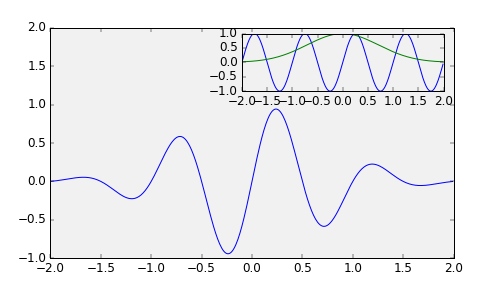

In [6]:
fig = plt.figure(figsize=(7, 4), facecolor='w')

left, bottom, width, height = 0.2, 0.1, 0.5, 0.8
ax = fig.add_axes([0.1, 0.1, 0.8, 0.8], facecolor="#f1f1f1")
ax.plot(x, y*np.exp(-x**2))
ax.set_ylim([-1, 2])
ax2 = fig.add_axes([0.48, 0.68, 0.4, 0.2], facecolor='none')
ax2.plot(x, y)
ax2.plot(x, np.exp(-x**2))


Creando y posicionando múltiples ejes en una misma figura

<IPython.core.display.Javascript object>


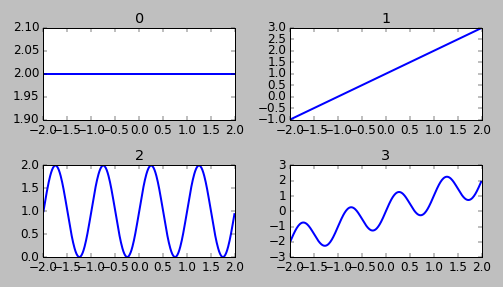

In [7]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(7, 4), 
                       sharex=False, sharey=False, tight_layout=True)

for i in range(2):
    for j in range(2):
        ax[i, j].plot(x, y**i + x**j, linewidth=2)
        ax[i, j].set_title(2*i+j)

Mayor control creando una grilla de ejes usando `gridspec`

<IPython.core.display.Javascript object>


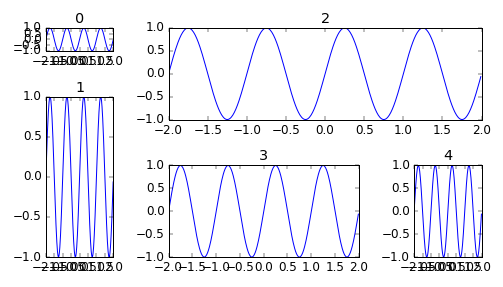

Text(0.5, 1.0, '4')

In [8]:
fig = plt.figure(figsize=(7, 4), facecolor='w', tight_layout=True)

gs = mpl.gridspec.GridSpec(4, 4)

ax = fig.add_subplot(gs[0, 0])
ax.plot(x, y); ax.set_title('0')
ax = fig.add_subplot(gs[1:, 0])
ax.plot(x, y); ax.set_title('1')
ax = fig.add_subplot(gs[0:2, 1:])
ax.plot(x, y); ax.set_title('2')
ax = fig.add_subplot(gs[2:4, 1:3])
ax.plot(x, y); ax.set_title('3')
ax = fig.add_subplot(gs[2:4, 3])
ax.plot(x, y); ax.set_title('4')

Graficando en escala logarítmica

<IPython.core.display.Javascript object>


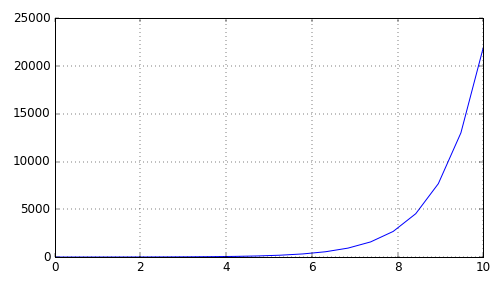

In [9]:
fig, ax = plt.subplots(figsize=(7, 4), tight_layout=True, facecolor='w')

x = np.linspace(0, 10, num=20)
ax.grid()

ax.plot(x, np.exp(x))
#ax.set_yscale('linear')

#ax.semilogy(x, np.exp(x))
#ax.loglog(x, np.exp(x))

Dos ejes de ordenadas independientes compartiendo el mismo eje de abscisas

<IPython.core.display.Javascript object>


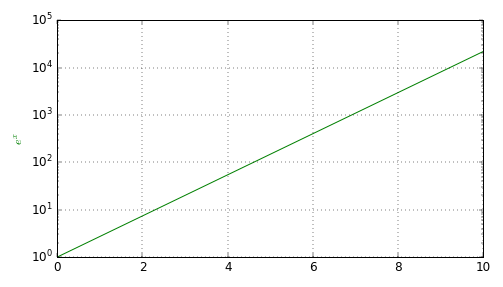

Text(0, 0.5, '$e^x$')

In [10]:
fig, ax = plt.subplots(figsize=(7, 4), tight_layout=True, facecolor='w')
ax.grid()
ax.semilogy(x, np.exp(x), c='green')
ax.set_ylabel(r'$e^x$', color="green")

#ax2 = ax.twinx()
#ax2.plot(x, x**2, c='red')
#ax2.set_ylabel(r'$x^2$', color="red")

Anotaciones en un gráfico

<IPython.core.display.Javascript object>


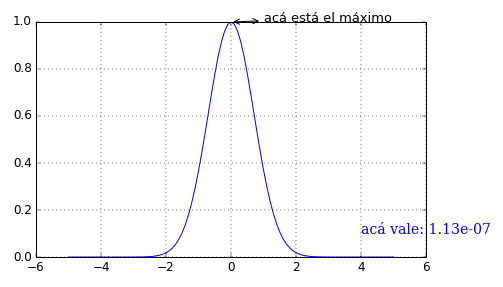

Text(1, 1, 'acá está el máximo')

In [11]:
fig, ax = plt.subplots(figsize=(7, 4), tight_layout=True, facecolor='w')
ax.grid()
x = np.linspace(-5, 5, num=101)
ax.plot(x, np.exp(-x**2), c='blue')

ax.text(4, 0.1, "acá vale: {0:0.2e}".format(np.exp(-16)), fontsize=14, color='blue', family="serif", rotation=0)
ax.annotate('acá está el máximo', xy=(0, 1), xytext=(1, 1), fontsize=13, 
            arrowprops=dict(arrowstyle="<->"))

## Tipos de gráficos 

Hasta ahora sólo hemos usado la función `plot` para crear lineas. 

Existen otras opciones para crear gráficas a partir de funciones con variable independiente unidimensional

- Linea con barras de error con `errorbar`
- Rangos de datos con `fill_between`
- Lineas sobrepuestas con `stackplot`
- Barras con `bar` y `hist`
- Cajas con `boxplot`



<IPython.core.display.Javascript object>


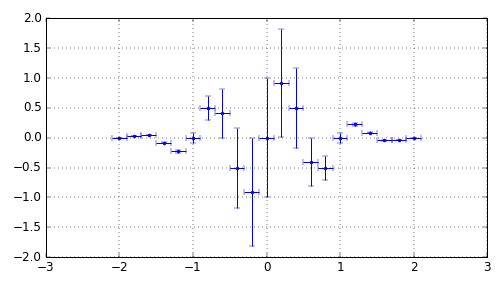

<ErrorbarContainer object of 3 artists>

In [12]:
fig, ax = plt.subplots(figsize=(7, 4), tight_layout=True, facecolor='w')
ax.grid()
x = np.linspace(-2, 2, num=21)
ax.errorbar(x=x, y=np.sin(2.0*np.pi*x)*np.exp(-x**2), xerr=0.1, yerr=np.exp(-x**2/0.4), 
            fmt='.', elinewidth=None, ecolor=None, capsize=None)

<IPython.core.display.Javascript object>


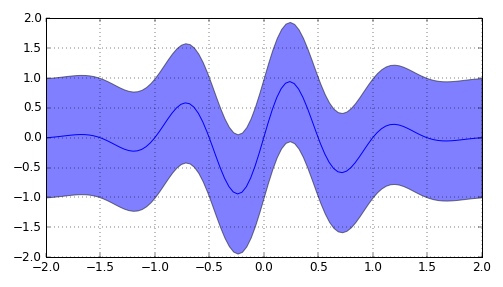

In [13]:
fig, ax = plt.subplots(figsize=(7, 4), tight_layout=True, facecolor='w')
ax.grid()
x = np.linspace(-2, 2, num=101)
ax.plot(x, np.sin(2.0*np.pi*x)*np.exp(-x**2))
ax.fill_between(x=x, y1=np.sin(2.0*np.pi*x)*np.exp(-x**2)- 1, 
                y2=np.sin(2.0*np.pi*x)*np.exp(-x**2) +1, alpha=0.5)

<IPython.core.display.Javascript object>


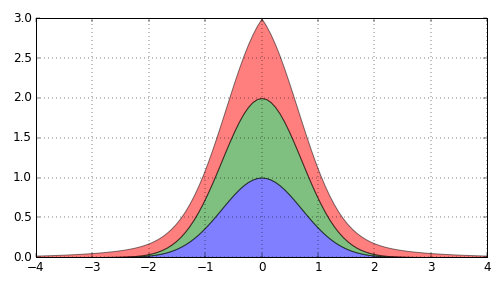

In [14]:
fig, ax = plt.subplots(figsize=(7, 4), tight_layout=True, facecolor='w')
ax.grid()
x = np.linspace(-4, 4, num=101)
ax.stackplot(x, np.exp(-x**2), np.exp(-x**2), np.exp(-np.abs(x)), alpha=0.5);

<IPython.core.display.Javascript object>


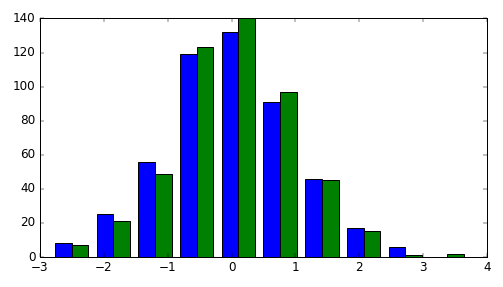

In [15]:
fig, ax = plt.subplots(figsize=(7, 4), tight_layout=True, facecolor='w')

data = np.random.randn(500, 2)
ax.hist(data, bins=None, range=None, density=None, weights=None, 
        histtype='bar', color=None);

# histype={'bar', 'barstacked', 'step',  'stepfilled'}

<IPython.core.display.Javascript object>


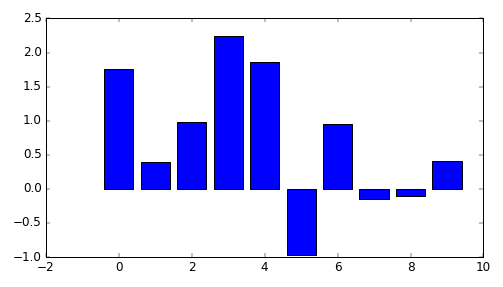

In [16]:
fig, ax = plt.subplots(figsize=(7, 4), tight_layout=True, facecolor='w')

np.random.seed(0)
ax.bar(x=np.arange(0, 10), height=np.random.randn(10), 
       width=0.8, bottom=0, align='center',
       color=None, edgecolor=None, linewidth=None, xerr=None, yerr=None);

# align = {'center', 'edge'}

<IPython.core.display.Javascript object>


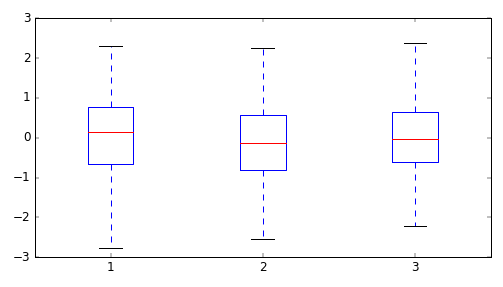

In [17]:
fig, ax = plt.subplots(figsize=(7, 4), tight_layout=True, facecolor='w')

# Linea naranja: media
# Caja: Menor y Mayor Cuartil
# Bigotes: Rango calculado a partir de los cuartiles
# Pelotas: Puntos fuera del rango
data = np.random.randn(100, 3)
#print(np.percentile(data, q=25, axis=0))
ax.boxplot(data, notch=False, sym='o', 
           showmeans=None, showcaps=None, showbox=None);

- Nubes de puntos con `scatter`

<IPython.core.display.Javascript object>


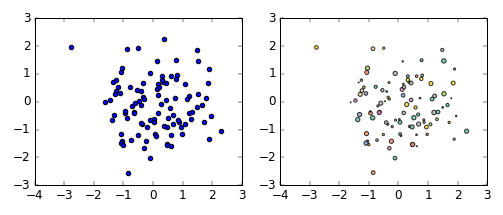

In [18]:
fig, ax = plt.subplots(1, 2, figsize=(7, 3), tight_layout=True, facecolor='w')


ax[0].scatter(x=data[:, 0], y=data[:, 1], 
           marker=None, s=None, c=None, alpha=1.)

# El tamañó y el color pueden especificarse "por punto"
ax[1].scatter(x=data[:, 0], y=data[:, 1], 
              s=np.random.randint(20, size=len(data)),
              c=np.random.randint(10, size=len(data)), cmap=plt.cm.Set2, alpha=0.8)

<IPython.core.display.Javascript object>


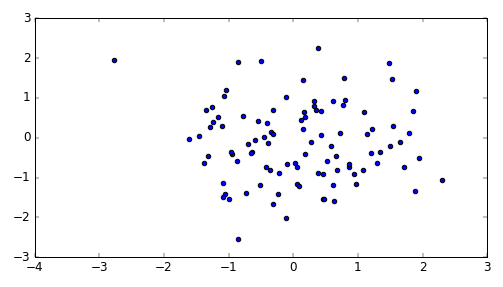

In [19]:
fig, ax = plt.subplots(figsize=(7, 4), tight_layout=True, facecolor='w')

ax.scatter(x=data[:, 0], y=data[:, 1], 
           marker=None, s=None, c=None, alpha=1.)

Para visualizar funciones que varían en dos variables independientes podemos usar **Mapas de colores**
- `contour` y `contourf`
- `pcolor`
- `matshow` y `imshow`


En los mapas de colores la variable dependiente (altura) se codifica como una escala de color

[Matplotlib](https://matplotlib.org/examples/color/colormaps_reference.html) ofrece muchas escalas de tipo gradiente, divergentes y categóricas

<IPython.core.display.Javascript object>


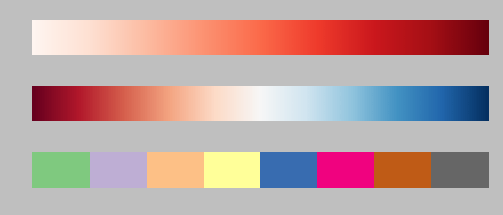

In [20]:
scale = np.tile(np.linspace(0, 1, num=256), (20, 1))
fig, ax = plt.subplots(3, figsize=(7, 3), tight_layout=True)
for ax_, cmap_ in zip(ax, [plt.cm.Reds, plt.cm.RdBu, plt.cm.Accent]):
    ax_.imshow(scale, cmap=cmap_)
    ax_.axis('off')


In [21]:
# "Pretty-print" de arreglos numpy
np.set_printoptions(precision=2)
# Creando una grilla bidimensional
x = np.linspace(-3, 3, num=10)
X, Y = np.meshgrid(x, x)
print(X)
print(Y)

[[-3.   -2.33 -1.67 -1.   -0.33  0.33  1.    1.67  2.33  3.  ]
 [-3.   -2.33 -1.67 -1.   -0.33  0.33  1.    1.67  2.33  3.  ]
 [-3.   -2.33 -1.67 -1.   -0.33  0.33  1.    1.67  2.33  3.  ]
 [-3.   -2.33 -1.67 -1.   -0.33  0.33  1.    1.67  2.33  3.  ]
 [-3.   -2.33 -1.67 -1.   -0.33  0.33  1.    1.67  2.33  3.  ]
 [-3.   -2.33 -1.67 -1.   -0.33  0.33  1.    1.67  2.33  3.  ]
 [-3.   -2.33 -1.67 -1.   -0.33  0.33  1.    1.67  2.33  3.  ]
 [-3.   -2.33 -1.67 -1.   -0.33  0.33  1.    1.67  2.33  3.  ]
 [-3.   -2.33 -1.67 -1.   -0.33  0.33  1.    1.67  2.33  3.  ]
 [-3.   -2.33 -1.67 -1.   -0.33  0.33  1.    1.67  2.33  3.  ]]
[[-3.   -3.   -3.   -3.   -3.   -3.   -3.   -3.   -3.   -3.  ]
 [-2.33 -2.33 -2.33 -2.33 -2.33 -2.33 -2.33 -2.33 -2.33 -2.33]
 [-1.67 -1.67 -1.67 -1.67 -1.67 -1.67 -1.67 -1.67 -1.67 -1.67]
 [-1.   -1.   -1.   -1.   -1.   -1.   -1.   -1.   -1.   -1.  ]
 [-0.33 -0.33 -0.33 -0.33 -0.33 -0.33 -0.33 -0.33 -0.33 -0.33]
 [ 0.33  0.33  0.33  0.33  0.33  0.33  0.33  0.33  0.3

<IPython.core.display.Javascript object>


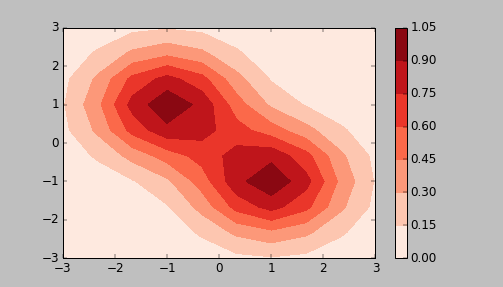

In [22]:
# Creando una gráfica de "altura"
Z = np.exp(-0.5*(X-1)**2 - 0.5*(Y+1)**2) + np.exp(-0.5*(X+1)**2 -0.5*(Y-1)**2)

fig, ax = plt.subplots(figsize=(7, 4))
cplot = ax.contourf(X, Y, Z, levels=None,
                    cmap=plt.cm.Reds, vmin=None, vmax=None, 
                    linewidths=None, linestyles='solid')
fig.colorbar(mappable=cplot, ax=ax, orientation='vertical', pad=0.05)

<IPython.core.display.Javascript object>


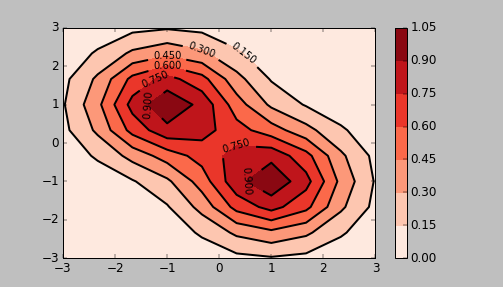

<a list of 8 text.Text objects>

In [23]:
# Creando una gráfica de "altura"
Z = np.exp(-0.5*(X-1)**2 - 0.5*(Y+1)**2) + np.exp(-0.5*(X+1)**2 -0.5*(Y-1)**2)

fig, ax = plt.subplots(figsize=(7, 4))
cplot = ax.contourf(X, Y, Z, levels=6, cmap=plt.cm.Reds)
fig.colorbar(mappable=cplot, ax=ax, orientation='vertical', pad=0.05)
cplot = ax.contour(X, Y, Z, levels=6, colors='k', linewidths=2, linestyles='solid')
ax.clabel(cplot, colors='k', fontsize=10)

<IPython.core.display.Javascript object>


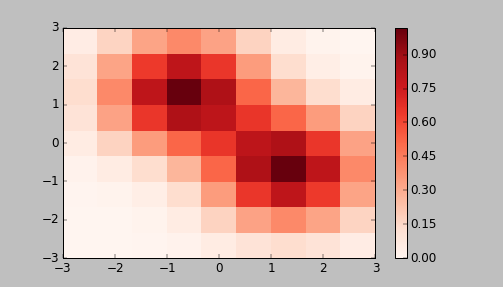

In [24]:
Z = np.exp(-0.5*(X-1)**2 - 0.5*(Y+1)**2) + np.exp(-0.5*(X+1)**2 -0.5*(Y-1)**2)

fig, ax = plt.subplots(figsize=(7, 4))
cplot = ax.pcolor(X, Y, Z, 
                  cmap=plt.cm.Reds, vmin=None, vmax=None)
fig.colorbar(mappable=cplot, ax=ax, orientation='vertical', pad=0.05)

/home/fabian/.local/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


<IPython.core.display.Javascript object>


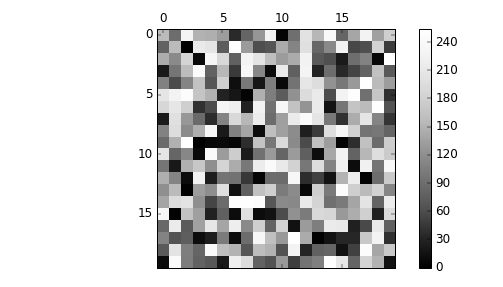

In [25]:
Z = np.random.randint(255, size=(20, 20))

fig, ax = plt.subplots(figsize=(7, 4), tight_layout=True, facecolor='w')
cplot = ax.matshow(Z, cmap=plt.cm.Greys_r, interpolation='none')
fig.colorbar(cplot)

# interpolation = {'none', 'bilinear', 'bicubic', 'gaussian', 'lanczos'}

<IPython.core.display.Javascript object>


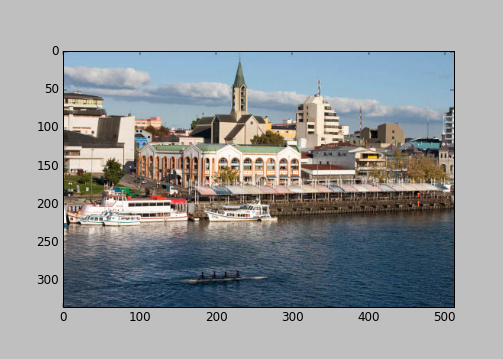

In [26]:
img = plt.imread('valdivia.png')
fig, ax = plt.subplots(figsize=(7, 5))
ax.imshow(img)

Otra opción para visualizar este tipo de funciones es usar gráficos 3D

- Notemos que es necesario importar el módulo `Axes3D`
- Luego podemos usar 
    - `plot_surface`
    - `contour`, `contourf`
    - `plot_wireframe`

<IPython.core.display.Javascript object>


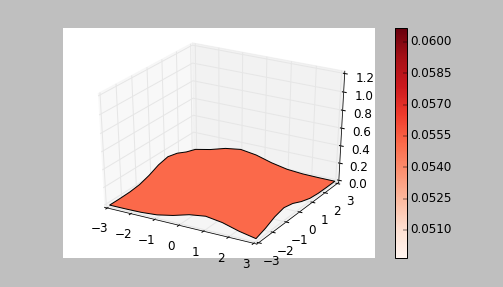

In [27]:
from mpl_toolkits.mplot3d.axes3d import Axes3D
fig, ax = plt.subplots(figsize=(7, 4), subplot_kw={'projection': '3d'})
x = np.linspace(-3, 3, num=10)
X, Y = np.meshgrid(x, x)
Z = np.exp(-0.5*(X-1)**2 - 0.5*(Y+1)**2) + np.exp(-0.5*(X+1)**2 -0.5*(Y-1)**2)
cplot = ax.plot_surface(X, Y, Z, cmap=plt.cm.Reds)
fig.colorbar(cplot)

El módulo `Axes3D` puede usarse también para hacer líneas y nubes de puntos en 3D a partir de arreglos unidimensionales (vértices)

<IPython.core.display.Javascript object>


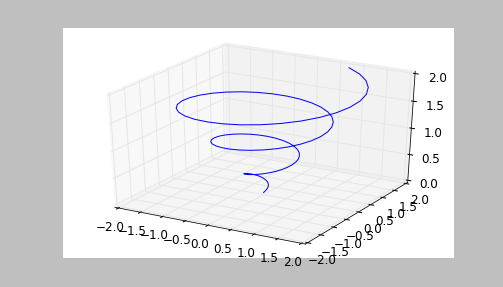

In [28]:
fig, ax = plt.subplots(figsize=(7, 4), subplot_kw={'projection': '3d'})

N = 100
rho = np.linspace(0, 2, num=N)
phi = np.linspace(0, 20, num=N)

ax.plot(rho*np.cos(phi), rho*np.sin(phi), np.linspace(0, 2, num=N))
# ax.scatter(rho*np.cos(phi), rho*np.sin(phi), np.linspace(0, 2, num=N))

## Configurando dinamicamente opciones generales de matplotlib

Matplotlib mantiene un diccionario llamado rcParams

Si hay opciones que siempre vamos a ocupar conviene escribirlas aquí

_internal.classic_mode: True
agg.path.chunksize: 0
animation.avconv_args: []
animation.avconv_path: avconv
animation.bitrate: -1
animation.codec: mpeg4
animation.convert_args: []
animation.convert_path: convert
animation.embed_limit: 20.0
animation.ffmpeg_args: []
animation.ffmpeg_path: ffmpeg
animation.frame_format: png
animation.html: none
animation.html_args: []
animation.writer: ffmpeg
axes.autolimit_mode: round_numbers
axes.axisbelow: False
axes.edgecolor: k
axes.facecolor: w
axes.formatter.limits: [-7, 7]
axes.formatter.min_exponent: 0
axes.formatter.offset_threshold: 2
axes.formatter.use_locale: False
axes.formatter.use_mathtext: False
axes.formatter.useoffset: True
axes.grid: False
axes.grid.axis: both
axes.grid.which: major
axes.labelcolor: k
axes.labelpad: 5.0
axes.labelsize: medium
axes.labelweight: normal
axes.linewidth: 1.0
axes.prop_cycle: cycler('color', ['b', 'g', 'r', 'c', 'm', 'y', 'k'])
axes.spines.bottom: True
axes.spines.left: True
axes.spines.right: True
axes.spin

/home/fabian/.local/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


<IPython.core.display.Javascript object>


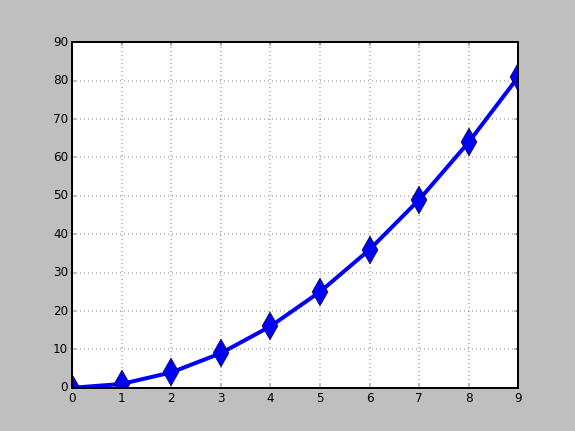

In [29]:
print(mpl.rcParams)
mpl.rcParams['axes.grid'] = True
mpl.rcParams['axes.linewidth'] = 2
mpl.rcParams['lines.linewidth'] = 4
mpl.rcParams['font.size'] = 12
mpl.rcParams['lines.marker'] = 'd'
mpl.rcParams['lines.markersize'] = 20

x = np.arange(10)
plt.figure()
plt.plot(x, x**2)

## ¿Cómo hacer buenas visualizaciones?



- https://informationisbeautiful.net/visualizations/
- https://bokeh.pydata.org/en/latest/docs/gallery.html

## Más allá de matplotlib

- [Bokeh](https://bokeh.pydata.org/en/latest/) y [Dash](https://dash.plot.ly/installation): Visualizaciónes con foco en la interactividad
- [Datashader](http://datashader.org/) Visualización con foco en grandes volúmenes de datos
- [Vispy](http://vispy.org/): Visualización aceleradas por GPU basadas en OpenGL
    